In [4]:
    
from SPARQLWrapper import SPARQLWrapper, SPARQLWrapper2, JSON, TURTLE, XML, RDFXML
import pprint
import csv
# from bs4 import BeautifulSoup

from collections import Counter
from operator import itemgetter
import pandas as pd

import sqlite3 as sql
import time

from importlib import reload
from shutil import copyfile

import matplotlib.pyplot as plt
import numpy as np
import statistics as stat
import scipy.stats
import pandas as pd
import pprint
import csv
import ast
import re
from collections import Counter
from operator import itemgetter

import networkx as nx

In [56]:
### Instructions pour l'installation dans JupyterLab : 
# https://ipywidgets.readthedocs.io/en/latest/user_install.html#installing-in-jupyterlab-3-0
# Utiliser idéalement JupyterLab 3.0

from ipywidgets import (
    interact, IntSlider, Checkbox,
    interactive, SelectMultiple)


In [5]:
import sparql_functions as spqf

In [6]:
### It's define the database ligne to use
pk_query = 101

# Connexion to the database
original_db = 'data/sparql_queries.db'
conn = sql.connect(original_db)

c = conn.cursor()

### It runs the query on the SQLite database to get the row values 
c.execute('SELECT * FROM query WHERE pk_query = ?', [pk_query]) ### a list around argument is needed for a string longer then one
#c.execute('SELECT * FROM query WHERE pk_query = 10')

rc = c.fetchone()

# close connexion
conn.close()


In [7]:
print(rc[2] +  "\n-----\n" + rc[4] +  "\n-----\n" +   rc[7]+  "\n\n\n------------------\n" +  rc[5] + "\n\n\n------------------\n")

We seek to obtain the nationalities of the individuals. First, we search the label of the nationality. Then, we realise a substring with the SUBSTR clause (gets the first five characters) and it counts) them.
-----
http://localhost:7200/repositories/IMPORT
-----
2021-06-16 10:40:31


------------------
PREFIX ome: <https://ontome.net/class/>
PREFIX  bio: <http://vocab.org/bio/0.1/>
PREFIX  egr:  <http://rdvocab.info/ElementsGr2/>

PREFIX  wd:   <http://www.wikidata.org/entity/>
PREFIX  wdt:  <http://www.wikidata.org/prop/direct/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>

PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT  ?nationality ?count_nationality ?natio
WHERE {
SELECT Distinct   ?nationality (count(?nationality) AS ?count_nationality) (substr(?nationality, 1,5) AS ?natio)
   WHERE
      {?person wdt:P27 ?na .
        ?na rdfs:label ?nationality
            FILT

In [9]:
### Execute the SPARQL query wrapped in the function in the library _sparql_functions.py_
# The first setting correspond to SPARQL Endpoint, the seconde to the query
q = spqf.get_json_sparql_result(rc[4],rc[5])

<class 'dict'>


In [10]:
##### Transform the result into a list with a fonction of the library #####
#### Result of the query
r_query = [l for l in spqf.sparql_result_to_list(q)]
print(len(r_query))
#r_query

503


In [11]:
# Save the list in the CSV format 
# It is necessary after saving to code all nationalities into continent 
file= 'spreadsheets/nationalities.csv'
with open(file, 'w', newline='') as csvfile:
    writ = csv.writer(csvfile, delimiter='|',
                            quotechar='"', quoting=csv.QUOTE_MINIMAL)
    writ.writerow(['nationality', 'freq', 'code'])
    for l in r_query:
        writ.writerow(l)

In [109]:
# It opens the file with the continent
file= 'spreadsheets/nationalities_coded.csv'
file_cont = []
with open(file, newline='') as csvfile:
    read = csv.reader(csvfile, delimiter='|', quotechar='"')
    for row in read:
        file_cont.append(row)

In [110]:
print(len(file_cont))
file_cont[1:10]

504


[['United States of America', '25500', 'Unite', 'North Am.'],
 ['Germany', '12223', 'Germa', 'Europe'],
 ['Spain', '5396', 'Spain', 'Europe'],
 ['France', '3933', 'Franc', 'Europe'],
 ['United Kingdom', '3853', 'Unite', 'Europe'],
 ['Japan', '3845', 'Japan', 'Asia'],
 ['Poland', '3016', 'Polan', 'Europe'],
 ['Brazil', '2721', 'Brazi', 'South Am.'],
 ['Canada', '2598', 'Canad', 'North Am.']]

In [111]:
# Keep only the nationality and its continent
df_coded_nation = pd.DataFrame(file_cont[1:], columns=['nationality','eff','code', 'continent'])
nat_coded = df_coded_nation[['nationality','continent']]
print(len(nat_codes))
nat_coded.head()

503


,nationality,continent
0,United States of America,North Am.
1,Germany,Europe
2,Spain,Europe
3,France,Europe
4,United Kingdom,Europe


In [112]:
## It's define the database ligne to use
pk_query = 102

# Connexion to the database
original_db = 'data/sparql_queries.db'
conn = sql.connect(original_db)

c = conn.cursor()

### It runs the query on the SQLite database to get the row values 
c.execute('SELECT * FROM query WHERE pk_query = ?', [pk_query]) ### a list around argument is needed for a string longer then one
#c.execute('SELECT * FROM query WHERE pk_query = 10')

rc = c.fetchone()

# close connexion
conn.close()


In [113]:
print(rc[2] +  "\n-----\n" + rc[4] +  "\n-----\n" +   rc[7]+  "\n\n\n------------------\n" +  rc[5] + "\n\n\n------------------\n")

We seek to obtain the year of the individuals to analyse the nationalities in the time.
-----
http://localhost:7200/repositories/IMPORT
-----
2021-06-16 17:58:19


------------------
PREFIX ome: <https://ontome.net/class/>
PREFIX  bio: <http://vocab.org/bio/0.1/>
PREFIX  egr:  <http://rdvocab.info/ElementsGr2/>

PREFIX  wd:   <http://www.wikidata.org/entity/>
PREFIX  wdt:  <http://www.wikidata.org/prop/direct/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>

PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
SELECT  ?person   ?year ?nationality
WHERE{
SELECT  ?person ?nationality (ROUND(AVG(?birthDate_avg)) AS ?year)
WHERE {
    SELECT Distinct ?person ?nationality (YEAR(?bD) AS ?birthDate_avg)
   WHERE
      {?person wdt:P569 ?bD .
       ?person wdt:P27 ?na .
       ?na rdfs:label ?nationality
        FILTER ( (!regex(?nationality, "t2") ) && (!regex(?nationality, "t1") )  && (!r

In [114]:
### Execute the SPARQL query wrapped in the function in the library _sparql_functions.py_
# The first setting correspond to SPARQL Endpoint, the seconde to the query
q = spqf.get_json_sparql_result(rc[4],rc[5])

<class 'dict'>


In [26]:
##### Transform the result into a list with a fonction of the library #####
#### Result of the query
r_query = [l for l in spqf.sparql_result_to_list(q)]
print(len(r_query))
#r_query

118874


In [115]:
df_result_year = pd.DataFrame(r_query)
df_result_year.columns =['uri_entity', 'year', 'nationality']


In [116]:
df_result_year.head()

,uri_entity,year,nationality
0,urn:uuid:fb3527da-478c-4e4f-a861-9de00b9d154b,1959,Canada
1,urn:uuid:5c7f3133-a15b-4f35-8e17-162cf63207f7,1809,United States of America
2,urn:uuid:92ebbd17-f4d1-4cdd-816c-5fcf4ba34dce,1912,Germany
3,urn:uuid:9ce56c33-08da-497c-afb0-38cb6ff6536c,1884,United States of America
4,urn:uuid:2178758f-d8df-447d-b64b-bd78dfe045b7,1940,Ukraine


In [117]:
# Add the continent of the individuals
merged = pd.merge(df_result_year,nat_coded, on='nationality', sort=False)
print(len(merged))
merged.sort_values(by=['uri_entity']).loc[30:50,]

118874


,uri_entity,year,nationality,continent
30,urn:uuid:63cef059-c16a-475c-b4a3-f2b013d705ee,1840,Canada,North Am.
75943,urn:uuid:63cf0cd9-b90b-423d-8d51-b0792bcba109,1954,Mexico,North Am.
11123,urn:uuid:63cf62b9-6d0a-4a63-ba09-da3055ea98a0,1872,United States of America,North Am.
82560,urn:uuid:63d00487-57f8-4fcd-a65d-a59145e0d193,1943,Kingdom of Italy,Europe
80048,urn:uuid:63d00487-57f8-4fcd-a65d-a59145e0d193,1943,Italy,Europe
...,...,...,...,...
13473,urn:uuid:6ab857e2-2483-4f69-8530-e9bc9f1f71f9,1783,United States of America,North Am.
33884,urn:uuid:6ab96a5f-a592-4ac8-8eeb-a7f1e6721a4f,1943,Germany,Europe
74929,urn:uuid:6ab9b73e-6411-42eb-ac1b-44eed5106a62,1880,Sweden,Europe
24496,urn:uuid:6aba2fd6-3ef1-4ba5-b6d5-dc10f2ad876b,1820,United States of America,North Am.


In [118]:
# drop duplicates
## Each person has one year and continent
coded_nationalities = merged[['uri_entity','year','continent']].drop_duplicates()
print(len(coded_nationalities))
coded_nationalities[:10]

110618


,uri_entity,year,continent
0,urn:uuid:fb3527da-478c-4e4f-a861-9de00b9d154b,1959,North Am.
1,urn:uuid:41ad1b0e-5f5e-43b6-9137-ea5f6bfe3cf4,1927,North Am.
2,urn:uuid:98651569-7301-4398-a760-bcb03931dc0f,1955,North Am.
3,urn:uuid:080c5cc7-c62c-46ec-b0e9-0b98b6adc235,1927,North Am.
4,urn:uuid:f967d755-8e28-4729-9966-1aa3e0bdba98,1827,North Am.
5,urn:uuid:50628dbc-50cd-4fd7-93f6-a444c2dac636,1860,North Am.
6,urn:uuid:d5e86bba-4821-421e-9706-438a58c978a3,1873,North Am.
7,urn:uuid:84d140c5-57f6-4a86-a8d2-280219e33b79,1882,North Am.
8,urn:uuid:c9fbd132-1389-44cd-a122-50c8a27dfe45,1900,North Am.
9,urn:uuid:9e654a4d-24d5-4c27-8e3c-d6915e0a7fb6,1933,North Am.


In [119]:
# Transform to list
coded_nat_list = coded_nationalities[['year', 'continent']].values.tolist()
coded_nat_list[:10]

[['1959', 'North Am.'],
 ['1927', 'North Am.'],
 ['1955', 'North Am.'],
 ['1927', 'North Am.'],
 ['1827', 'North Am.'],
 ['1860', 'North Am.'],
 ['1873', 'North Am.'],
 ['1882', 'North Am.'],
 ['1900', 'North Am.'],
 ['1933', 'North Am.']]

In [138]:
### Group the list per continent

counter= Counter([t[1] for t in coded_nat_list])
c_coded_nat_list = list(zip(counter.keys(), counter.values()))
sorted_coded_nat_list = sorted(c_coded_nat_list, key=itemgetter(1), reverse=True)
sorted_coded_nat_list



[('Europe', 57951),
 ('North Am.', 29127),
 ('South Am.', 8074),
 ('Asia', 7395),
 ('Middle East', 2594),
 ('Africa', 1994),
 ('Oceania', 1528),
 ('uncoded', 1172),
 ('Central Am.', 783)]

In [139]:
### Group in series per continent with the 'groupby' function Pandas
gb_coded_nationalities = coded_nationalities.groupby('continent').size()
gb_coded_nationalities.sort_values(ascending = False)



continent
Europe         57951
North Am.      29127
South Am.       8074
Asia            7395
Middle East     2594
Africa          1994
Oceania         1528
uncoded         1172
Central Am.      783
dtype: int64

In [140]:
### Transform the object Series into a DataFrame and add the label of the 'frequency' column
# continent is define as index
df_coded_nat = gb_coded_nationalities.to_frame()
df_coded_nat.columns = ['frequency']
df_coded_nat



,frequency
continent,
Africa,1994
Asia,7395
Central Am.,783
Europe,57951
Middle East,2594
North Am.,29127
Oceania,1528
South Am.,8074
uncoded,1172


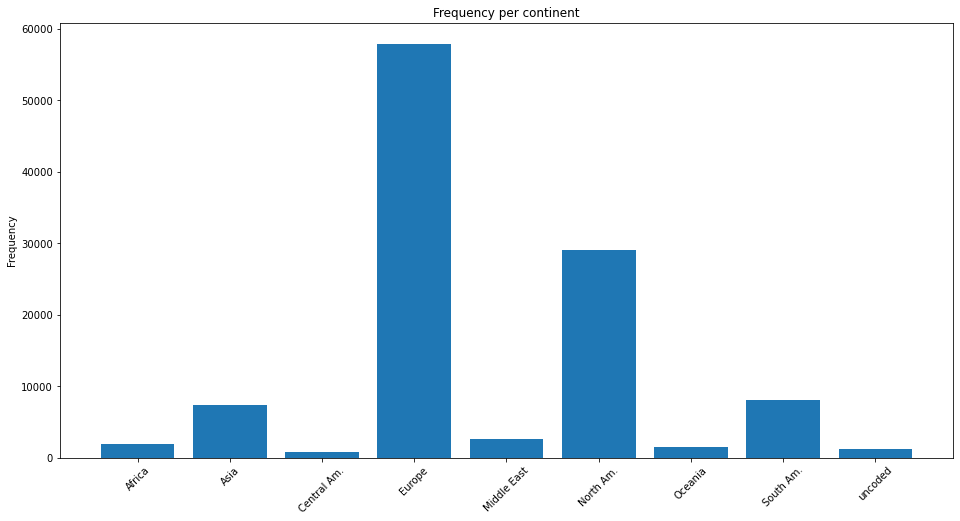

In [123]:


# Distribution per year

objects = [l for l in df_coded_nat.index]
eff = [l for l in df_coded_nat['frequency']]

p1 = plt.bar(objects, eff)

#plt.xticks(l5Years)
plt.ylabel('Frequency')
plt.title('Frequency per continent')
plt.gcf().set_size_inches(16, 8)
#plt.gca().axes.get_xaxis().set_visible(False)
# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
#plt.savefig('exported_pictures/effectifs_naissances_par_annee.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()



In [141]:
values_l = [x[0] for x in sorted_coded_nat_list]
values_l

['Europe',
 'North Am.',
 'South Am.',
 'Asia',
 'Middle East',
 'Africa',
 'Oceania',
 'uncoded',
 'Central Am.']

In [142]:
### Transformer les années en entiers
int_coded_nat_list = [[int(l[0]), l[1]] for l in coded_nat_list]

In [143]:
### Create a list with intervals of 10 years, corresponding approximately to one generation.

def create_years_list(period = 10, y_start = 1791, y_end = 1801):

    y_list = []
    y_list.append(y_start)

    while y_start < y_end:
        y_start += period
        y_list.append(y_start)
    return y_list

In [144]:
def interactive_nationality_periods(nationality, period = 10, remaining = False):
    
    output_l = []
    work_l = int_coded_nat_list # les années doivent être des entiers
    for a in nationality:
        prov_l = []
        for l in work_l:            
            if a == l[1]:
                output_l.append(l)
            else:
                prov_l.append(l)
        work_l = prov_l

    print('Nationalities: ', len(output_l))
    print('The other (unchosen): ',len(work_l))
    # print('\n-----')
    
    period = period # 20 10
    y_list = create_years_list(period = period, y_start = 1771, y_end = 2021)
    
    
    
    with plt.style.context("ggplot"):
                
        fig, ax = plt.subplots(figsize=(16,8)) 


        width =  period - (period * 10 / 100)

        bottom_list = []
        i = 0
        while i < len(y_list):
            bottom_list.append(0)
            i += 1

        if remaining:
            i_list = []
            for i in y_list:
                i_n = 0
                for l in work_l:
                    if int(l[0]) >= i and int(l[0]) < (i + period):
                        i_n += 1
                i_list.append([i, i_n]) 
            # print('BBB: ', i_list)            
            draw_l = [i[1] for i in i_list]
            ax.bar(y_list, draw_l, width, bottom = bottom_list, label='remaining' ) #, bottom = bottom_list)
            bottom_list = [x + y for x, y in zip(bottom_list, draw_l)]


        for a in nationality:
            i_list = []
            for i in y_list:
                i_n = 0
                for l in output_l:
                    if l[1] == a and int(l[0]) >= i and int(l[0]) < (i + period):
                        i_n += 1
                i_list.append([i, i_n]) 
            # print('AAA: ', i_list)            
            draw_l = [i[1] for i in i_list]
            ax.bar(y_list, draw_l, width, bottom = bottom_list, label=a ) #, bottom = bottom_list)
            bottom_list = [x + y for x, y in zip(bottom_list, draw_l)]
            # print(bottom_list)



        ax.set_ylabel('Frequency')
        ax.set_title('Frequency per nationality')
        plt.xticks(y_list,rotation=45)

        ax.legend()

        p_out = plt.show()


In [150]:


k = interactive(interactive_nationality_periods, nationality=SelectMultiple(
    options=sorted(values_l),
    value=['Europe',
 'North Am.',
 'South Am.',
 'Asia'],
    #rows=10,
    description='Nationalities',
    disabled=False
),  period=IntSlider(min=5, max=50, step=5, value=10),
    remaining = Checkbox(
    value=False,
    description='The other (unchosen)',
    disabled=False
))



Nationalities:  102547
The other (unchosen):  8071


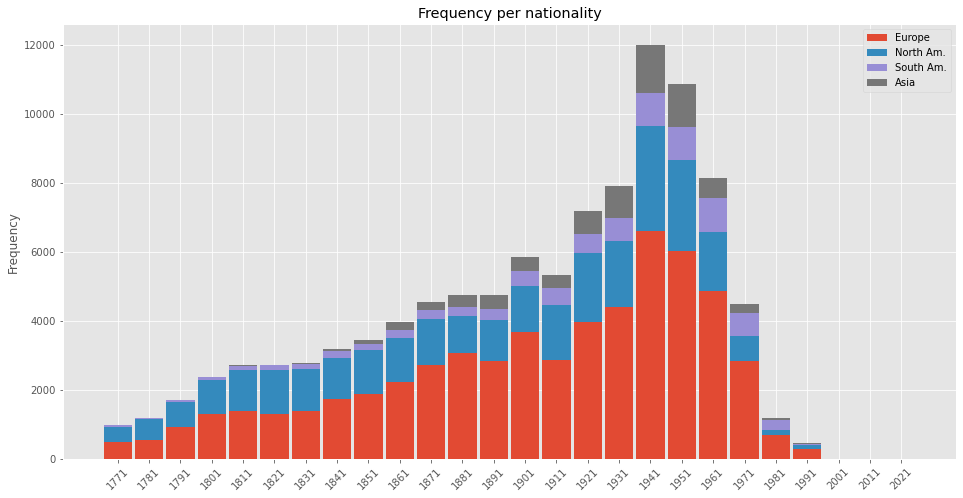

In [151]:
display(k)

In [57]:
### Create a list with intervals of 20 years, corresponding approximately to one generation.

def create_years_list(period = 20, y_start = 1391, y_end = 1801):

    y_list = []
    y_list.append(y_start)

    while y_start < y_end:
        y_start += period
        y_list.append(y_start)
    return y_list

In [58]:
def interactive_nationality_periods(nationality, period = 20, remaining = False):
    
    output_l = []
    work_l = int_coded_nat_list # les années doivent être des entiers
    for a in nationality:
        prov_l = []
        for l in work_l:            
            if a == l[1]:
                output_l.append(l)
            else:
                prov_l.append(l)
        work_l = prov_l

    print('Nationalities: ', len(output_l))
    print('The other (unchosen): ',len(work_l))
    # print('\n-----')
    
    period = period # 20 10
    y_list = create_years_list(period = period, y_start = 1771, y_end = 2021)
    
    
    
    with plt.style.context("ggplot"):
                
        fig, ax = plt.subplots(figsize=(16,8)) 


        width =  period - (period * 20 / 100)

        bottom_list = []
        i = 0
        while i < len(y_list):
            bottom_list.append(0)
            i += 1

        if remaining:
            i_list = []
            for i in y_list:
                i_n = 0
                for l in work_l:
                    if int(l[0]) >= i and int(l[0]) < (i + period):
                        i_n += 1
                i_list.append([i, i_n]) 
            # print('BBB: ', i_list)            
            draw_l = [i[1] for i in i_list]
            ax.bar(y_list, draw_l, width, bottom = bottom_list, label='remaining' ) #, bottom = bottom_list)
            bottom_list = [x + y for x, y in zip(bottom_list, draw_l)]


        for a in nationality:
            i_list = []
            for i in y_list:
                i_n = 0
                for l in output_l:
                    if l[1] == a and int(l[0]) >= i and int(l[0]) < (i + period):
                        i_n += 1
                i_list.append([i, i_n]) 
            # print('AAA: ', i_list)            
            draw_l = [i[1] for i in i_list]
            ax.bar(y_list, draw_l, width, bottom = bottom_list, label=a ) #, bottom = bottom_list)
            bottom_list = [x + y for x, y in zip(bottom_list, draw_l)]
            # print(bottom_list)



        ax.set_ylabel('Frequency')
        ax.set_title('Frequency per nationality')
        plt.xticks(y_list,rotation=45)

        ax.legend()

        p_out = plt.show()


In [71]:


k = interactive(interactive_nationality_periods, nationality=SelectMultiple(
    options=sorted(values_l),
    value=['Asia','Europe', 'North Am.'],
    #rows=10,
    description='Nationalities',
    disabled=False
),  period=IntSlider(min=5, max=50, step=5, value=20),
    remaining = Checkbox(
    value=False,
    description='The other (unchosen)',
    disabled=False
))

